In [1]:
import skimage
import scipy
from matplotlib import pyplot as plt
from skimage import io
import PIL
import numpy as np
from skimage import draw
from skimage import color, img_as_float
from skimage.filters import threshold_otsu

In [2]:
Avengers = io.imread('avengers_imdb.jpg')
bush_house = io.imread("bush_house_wikipedia.jpg")
forestry = io.imread("forestry_commission_gov_uk.jpg")
rolland = io.imread("rolland_garros_tv5monde.jpg")



<class 'numpy.ndarray'>
uint8
Size of the Image : (1200, 630, 3)
0 255


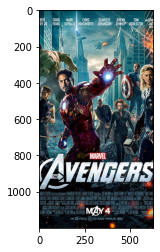

In [3]:
print(type(Avengers))
print(Avengers.dtype)
print(f"Size of the Image : {Avengers.shape}")
print(Avengers.min(), Avengers.max())

plt.imshow(Avengers);


<class 'numpy.ndarray'>
uint8
Size of the Image : (640, 508, 3)
0 255


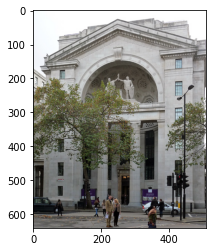

In [4]:
print(type(bush_house))
print(bush_house.dtype)
print(f"Size of the Image : {bush_house.shape}")
print(bush_house.min(), bush_house.max())

plt.imshow(bush_house);

<class 'numpy.ndarray'>
uint8
Size of the Image : (414, 620, 3)
0 255


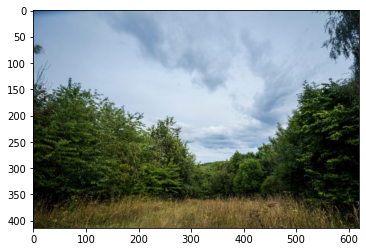

In [5]:
print(type(forestry))
print(forestry.dtype)
print(f"Size of the Image : {forestry.shape}")
print(forestry.min(), forestry.max())

plt.imshow(forestry);

<class 'numpy.ndarray'>
uint8
Size of the Image : (600, 1070, 3)
0 255


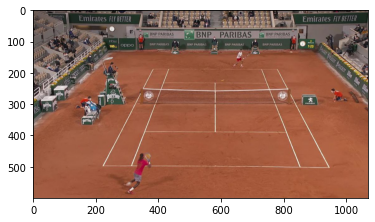

In [6]:
print(type(rolland))
print(rolland.dtype)
print(f"Size of the Image : {rolland.shape}")
print(rolland.min(), rolland.max())

plt.imshow(rolland);

In [7]:
def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    r ,c = coords # y ,x
    
    H = out[r:r+50, c:c+40]
    
    H[:, :10, :] = color 
    # row , column , channel 
    # : -> all rows , :10 -> the first 10 columns , : -> all channels and assign them the color
    # The right vertical line of H
    H[:, -10:, :] = color
    # : -> all rows , -10: -> the last 10 columns , : -> all channels
    # The left vertical line of H
    H[20:30,:] = color
    # 20:30 -> rows from 20 to 30 , : -> all columns so the middle bin of H
    
    return out 

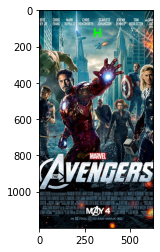

In [8]:
img_H = draw_H(Avengers, (100, 300))
plt.imshow(img_H);


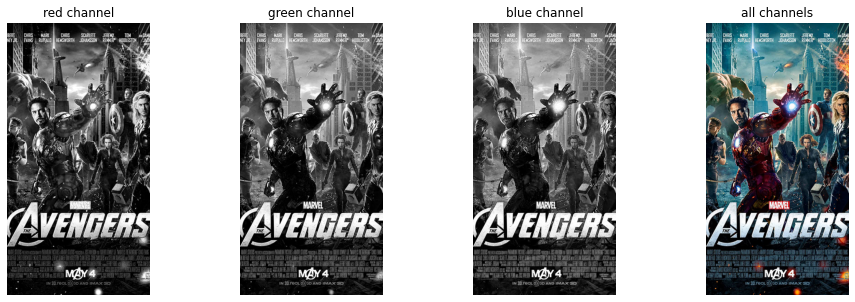

In [9]:
# --- read in the image ---

image = plt.imread('avengers_imdb.jpg')

# --- assign each color channel to a different variable ---

r = image[:,:, 0] # FIXME: grab channel from image...
g = image[..., 1] # FIXME
b = image[..., 2] # FIXME

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

<ipython-input-10-e0b841556ede>:5: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  r, c = draw.circle(100, 100, 100)
<ipython-input-10-e0b841556ede>:8: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  r, c = draw.circle(100, 200, 100)
<ipython-input-10-e0b841556ede>:11: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  r, c = draw.circle(200, 150, 100)


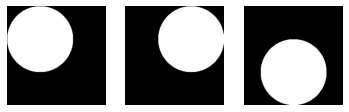

In [10]:


red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.circle(100, 100, 100)
red[r, c] = 1

r, c = draw.circle(100, 200, 100)
green[r, c] = 1

r, c = draw.circle(200, 150, 100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')


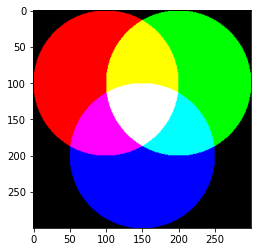

In [11]:
colour_stack = np.dstack([red,green,blue])
plt.imshow(colour_stack)


In [12]:
# img = Avengers.copy()
# image = img_as_float(img)

# gray = color.rgb2gray(image)
# my_gray = image @ [0.2126,0.7152,0.0722]   

# # --- display the results ---

# f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

# ax0.imshow(gray, cmap='gray')
# ax0.set_title('skimage.color.rgb2gray')

# ax1.imshow(my_gray, cmap='gray')
# ax1.set_title('my rgb2gray')

def Gray_scale(image):
    img = image.copy()
    img = img_as_float(img)
    gray = img @ [0.2126,0.7152,0.0722]
    return gray

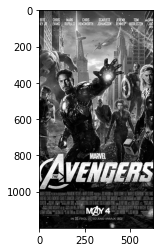

In [13]:
img = Gray_scale(Avengers)
plt.imshow(img, cmap = 'gray')